In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

## Дані

In [94]:
df = (pd.read_excel('../Lab5/data.xlsx', na_values='-').set_index('Country')
      .apply(pd.to_numeric, errors='coerce').fillna(0).drop(columns=['All']))

m = 2
n = len(df)
d = len(df.columns)
print(f'Параметри: m={m}, n={n}, d={d}')

df

Параметри: m=2, n=71, d=3


,Work,OrgTour,Private
Country,,,
Албанія,0.0,0.0,4.0
Азербайджан,0.0,0.0,16791.0
Австрія,663.0,11639.0,84507.0
Вірменія,158.0,1367.0,10908.0
Бельгія,29.0,0.0,17458.0
...,...,...,...
Македонія,0.0,12.0,33.0
Єгипет,542.0,24864.0,375021.0
Велика Британія,0.0,0.0,76590.0


### Реалізація PCA

### Нормування

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[df.columns])
df = pd.DataFrame(X_scaled, columns=df.columns)
df

,Work,OrgTour,Private
0,-0.193683,-0.407912,-0.283424
1,-0.193683,-0.407912,-0.268114
2,-0.140279,1.264630,-0.206358
3,-0.180956,-0.211472,-0.273480
4,-0.191347,-0.407912,-0.267506
...,...,...,...
66,-0.193683,-0.406188,-0.283397
67,-0.150025,3.165083,0.058587
68,-0.193683,-0.407912,-0.213579
69,-0.193683,-0.407912,-0.264560


### Кореляційна матриця

In [96]:
df.corr()

,Work,OrgTour,Private
Work,1.000000,0.322052,0.890656
OrgTour,0.322052,1.000000,0.403613
Private,0.890656,0.403613,1.000000


### Коваріаційна матриця

In [97]:
df.cov()

,Work,OrgTour,Private
Work,1.014286,0.326653,0.903379
OrgTour,0.326653,1.014286,0.409379
Private,0.903379,0.409379,1.014286


### Стандартні відхилення

In [98]:
df.std()

Work       1.007118
OrgTour    1.007118
Private    1.007118
dtype: float64

### Cередні значення

In [99]:
df.mean()

Work      -2.345542e-18
OrgTour   -4.143790e-17
Private    2.345542e-18
dtype: float64

### Розрахунок головних компонент

In [100]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

### Матриця проекцій

In [101]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-0.477068,-0.234719
1,-0.467093,-0.238356
2,0.301894,1.244244
3,-0.380900,-0.063483
4,-0.465214,-0.239317
...,...,...
66,-0.476334,-0.233163
67,1.257869,2.907215
68,-0.431560,-0.251310
69,-0.464777,-0.239200


### Матриця навантажень

In [102]:
P = pca.components_.T
loadings = pd.DataFrame(P, index=df.columns, columns=['PC1', 'PC2'])
loadings

,PC1,PC2
Work,0.634737,-0.349411
OrgTour,0.415447,0.906362
Private,0.651547,-0.237529


### Відновлені дані

In [103]:
X_approx = X_pca @ P.T
df_approx = pd.DataFrame(X_approx, columns=df.columns)
df_approx

,Work,OrgTour,Private
0,-0.220799,-0.410937,-0.255079
1,-0.213197,-0.410089,-0.247716
2,-0.243129,1.253156,-0.098846
3,-0.219590,-0.215782,-0.233095
4,-0.211668,-0.410179,-0.246264
...,...,...,...
66,-0.220877,-0.409221,-0.254971
67,-0.217397,3.157567,0.129013
68,-0.186117,-0.407068,-0.221488
69,-0.211432,-0.409892,-0.246007


### Матриця помилок

In [104]:
E = df.values - X_approx
df_e = pd.DataFrame(E, columns=df.columns)
df_e

,Work,OrgTour,Private
0,0.027115,0.003025,-0.028345
1,0.019513,0.002177,-0.020398
2,0.102850,0.011474,-0.107513
3,0.038633,0.004310,-0.040385
4,0.020321,0.002267,-0.021242
...,...,...,...
66,0.027194,0.003034,-0.028427
67,0.067372,0.007516,-0.070426
68,-0.007567,-0.000844,0.007910
69,0.017749,0.001980,-0.018553


### Перевірка рівності сум вибіркових дисперсій

In [105]:
original_variance_sum = df.var(ddof=0).sum()
print(f'Сума дисперсій початкових ознак: {original_variance_sum:.4f}')

Сума дисперсій початкових ознак: 3.0000


In [106]:
pc_variances = np.var(X_pca, axis=0, ddof=0)
projected_variance_sum = pc_variances.sum()
print(f'Сума дисперсій головних компонент: {projected_variance_sum:.4f}')

Сума дисперсій головних компонент: 2.8951


### Відносна частка розкиду

In [107]:
print("Частка дисперсії для кожної головної компоненти:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")
print(f'Загальна частка розкиду (PC1 + PC2): {np.sum(pca.explained_variance_ratio_):.4f}')

Частка дисперсії для кожної головної компоненти:
PC1: 0.7083
PC2: 0.2567
Загальна частка розкиду (PC1 + PC2): 0.9650


### Матриця коваріації проекцій

In [108]:
cov_matrix_pca = np.cov(X_pca.T)
df_cov = pd.DataFrame(cov_matrix_pca, columns=['PC1', 'PC2'], index=['PC1', 'PC2'])
df_cov

,PC1,PC2
PC1,2.155390e+00,2.791418e-16
PC2,2.791418e-16,7.810727e-01


### Діаграма розсіювання для PC1 і PC2

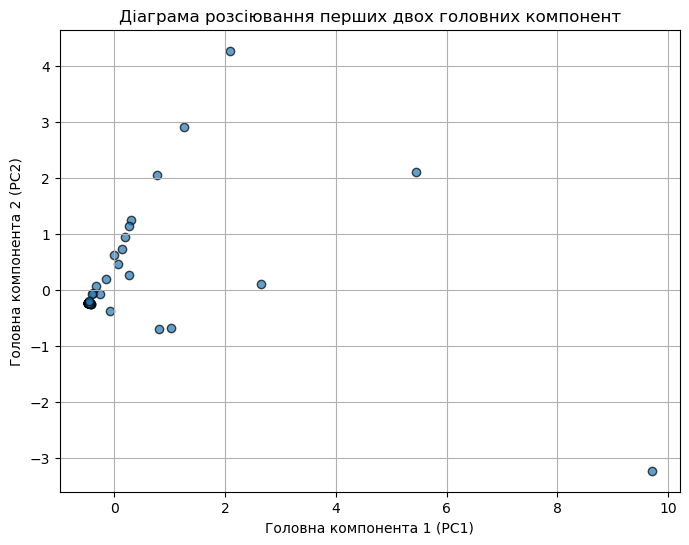

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Головна компонента 1 (PC1)')
plt.ylabel('Головна компонента 2 (PC2)')
plt.title('Діаграма розсіювання перших двох головних компонент')
plt.grid(True)
plt.show()

### Інтерпретація головних компонент

In [110]:
loadings

,PC1,PC2
Work,0.634737,-0.349411
OrgTour,0.415447,0.906362
Private,0.651547,-0.237529


* PC1: Відображає загальну кількість поїздок, в основному робочі та приватні
* PC2: Відображає рівень організованих